<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2021/blob/master/04_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4 - Pandas (First part)
> An introduction on Pandas basic level concepts. First, you will become familiar with Pandas and its cornerstone variable types: the *Series* and the *DataFrame*. You will learn how to *import data* with Pandas and some tips to perform DataFrame *preliminary exploration* (including a very basic *visual inspection*). In addition, you will learn how to *access* the data stored in a DataFrame. Finally, you will be introduced to the concepts of DataFrame *boolean indexing* and DataFrame *filtering*.

## Outline
 * [What is Pandas?](#What-is-Pandas?)
 * [Series and DataFrames](#Series-and-DataFrames)
 * [Loading data as a DataFrame](#Loading-data-as-a-DataFrame)
 * [DataFrame basic inspection](#DataFrame-basic-inspection)
 * [DataFrame visual inspection](#DataFrame-visual-inspection)
 * [DataFrame access](#DataFrame-access)
   * [Accessing whole columns](#Accessing-whole-columns)
   * [Accessing whole rows](#Accessing-whole-rows)
   * [Accessing columns and rows simultaneously](#Accessing-columns-and-rows-simultaneously)
 * [Series methods](#Series-methods)
 * [DataFrame boolean indexing](#DataFrame-boolean-indexing)
 * [Filtering DataFrames with boolean indexing](#Filtering-DataFrames-with-boolean-indexing)

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session.
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

## What is Pandas?

[NumPy](https://numpy.org/) makes life a lot easier when dealing with numeric matrices and vectors in Python. However, those used to work with dedicated languages like [R](https://www.r-project.org/), doing data analysis directly with NumPy feels like a step back. Fortunately, some nice folks have written the Python Data Analysis Library (a.k.a. [Pandas](http://pandas.pydata.org/)). Pandas provides Python with an R-like DataFrame object, produces high quality plots with [matplotlib](https://matplotlib.org/), and nicely integrates with other libraries that expect NumPy arrays such [seaborn](https://seaborn.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/), ...

<div class="alert alert-block alert-info"><b>Tip:</b> We will devote a whole boot camp session to NumPy on October 4 <sup>th</sup> (15:00-16:00).
</div>

## Series and DataFrames

Pandas works with [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of data, that then are arranged in [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) objects. A DataFrame is the object closest to an spreadsheet that we will see throughout the present session. DataFrames, though, given that they are integrated in Python and can be combined with so many different packages, are much more powerful than simple Excel spreadsheets. We use to load Pandas with the `pd` alias:

In [1]:
# Load package with its corresponding alias
import pandas as pd

## Loading data as a DataFrame

In order to load data with Pandas we use functions like [`pd.read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) and [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). As you may have guessed, we choose depending on the format of our input data. For example, [`pd.read_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) works with `xlsx`, `xls`... [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) with `csv`, `tsv`, `txt`... These functions have multiple arguments providing great flexibility when importing data, like skipping some rows/columns, specifying the column delimiter or picking a particular sheet within a spreadsheet. Let's begin by importing `Spreadsheet.xlsx` from `/MMRES-python-bootcamp2022/datasets` sub-folder:

In [2]:
# Reading an Excel SpreadSheet and storing it as a DataFrame called `df_local`
df_local = pd.read_excel(io='datasets/Spreadsheet.xlsx')

# Return the DataFrame
df_local

,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.294863,1.529504
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.714405,1.226853
2,1985-04-06_0123_GA_T_R3,PD,Amanda,CCUGAACCCACUAUUGAUGAG,133.493350,1.768732
3,1985-04-06_0123_GA_T_R4,PD,Amanda,CCUGAACCCACUAUUGAUGAG,62.007904,1.331619
4,1985-04-06_0123_GA_C_R1,PD,Sequest,CCUGAACCCACUAUUGAUGAG,112.643842,1.853473
5,1985-04-06_0123_GA_C_R2,PD,Sequest,CCUGAACCCACUAUUGAUGAG,116.570249,1.821342
6,1985-04-06_0123_GA_T_R3,PD,Sequest,CCUGAACCCACUAUUGAUGAG,NaN,1.406125
7,1985-04-06_0123_GA_T_R4,PD,Sequest,CCUGAACCCACUAUUGAUGAG,64.983534,1.903608
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,97.934919,1.437262
9,1985-04-06_0123_GA_C_R2,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,93.601301,1.647577


In [3]:
# Get the data type of `df`
print(type(df_local))

<class 'pandas.core.frame.DataFrame'>


Pandas functions `pd.read_excel()` and `pd.read_csv()` are able to load non-locally stored data. Let's import again `Spreadsheet.xlsx`, but this time straight from the [MMRES Python boot camp GitHub repository](https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022):

In [4]:
# Define the GitHub url towards the metadata file in xlsx format
url_excel = 'https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/'

# Reading an Excel SpreadSheet and storing it as a DataFrame called `df`
df = pd.read_excel(io=f'{url_excel}Spreadsheet.xlsx?raw=true')

# Return the DataFrame
df.head(2)

,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.294863,1.529504
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.714405,1.226853


There is an important detail here when using `read_excel()` to directly load data from GitHub: you must pass the URL to the *raw view* of the file. Note the `?raw=true` we appended at the end of the URL. Similarly, when using `read_csv()` you need to pass the URL to the *raw view* of the file as well, but with an slightly different syntax:

In [5]:
# Define the GitHub url towards the metadata file in csv format
# url_excel = 'https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/'
url_csv =     'https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/main/datasets/'

# Reading an csv and storing it as a DataFrame called `df`
df = pd.read_csv(filepath_or_buffer=f'{url_csv}Spreadsheet.csv')

# Return the DataFrame
df.head(2)

,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.2949,1.5295
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.7144,1.2269


Note that in this case there is no need of `?raw=true`, but `url_csv` is a bit different from `url_excel`.

<div class="alert alert-block alert-success"><b>Practice:</b>

Load the Misophoinia dataset stored in our [MMRES Python boot camp GitHub repository](https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022) directly from the its *raw view* URL: 
    
1) Open the [link](https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022) towards MMRES Python boot camp GitHub repository and navigate to the file `misophoinia_data.xlsx`. You should see in your web browser a "View raw" text with a hyperlink defined.

2) Get the *raw view* URL to `misophoinia_data.xlsx` by copying the "View raw" hyperlink: *Right click*,  *Copy Link*.

3) In the 1<sup>st</sup> code cell below, load `misophoinia_data.xlsx` straight from GitHub using the "View raw" hyperlink. Store the data as a DataFrame called `df_misophoinia`.
    
Un-comment and fill only those code lines with underscores `___`.

</div>

In [6]:
# Reading the Misophoinia data set and storing it as a DataFrame called `df_misophoinia`
# df_misophoinia = pd.read_excel(io=___)

# Return the Misophoinia DataFrame
# df_misophoinia

In [7]:
# Reading the Misophoinia data set and storing it as a DataFrame called `df_misophoinia`
df_misophoinia = pd.read_excel(io='https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/misophoinia_data.xlsx?raw=true')

# Return the Misophoinia DataFrame
df_misophoinia

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


## DataFrame basic inspection

Usually, the first thing one should do with a new DataFrame is getting familiar with its *Series* data. Pandas DataFrame objects have many *methods* to this aim, like [`.head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html), [`.tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html), [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)...


In [8]:
# DataFrame head (five first rows)
df.head()

,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.2949,1.5295
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.7144,1.2269
2,1985-04-06_0123_GA_T_R3,PD,Amanda,CCUGAACCCACUAUUGAUGAG,133.4933,1.7687
3,1985-04-06_0123_GA_T_R4,PD,Amanda,CCUGAACCCACUAUUGAUGAG,62.0079,1.3316
4,1985-04-06_0123_GA_C_R1,PD,Sequest,CCUGAACCCACUAUUGAUGAG,112.6438,1.8535


In [9]:
# DataFrame tail (last first rows)
df.tail()

,Raw,Software,Node,RNA,Intensity,Amplitude
7,1985-04-06_0123_GA_T_R4,PD,Sequest,CCUGAACCCACUAUUGAUGAG,64.9835,1.9036
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,97.9349,1.4373
9,1985-04-06_0123_GA_C_R2,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,93.6013,1.6476
10,1985-04-06_0123_GA_T_R3,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,84.1693,1.9817
11,1985-04-06_0123_GA_T_R4,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,144.0198,1.6713


In [10]:
# DataFrame (basic) statistical description (only for numeric columns!)
df.describe()

,Intensity,Amplitude
count,11.000000,12.000000
mean,102.221209,1.631592
std,29.897234,0.244060
min,62.007900,1.226900
25%,78.441850,1.429500
50%,97.934900,1.659450
75%,125.031750,1.829350
max,144.019800,1.981700


The [`.info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method is particularly useful. It gives the name of each *DataFrame column* with their corresponding data. This method also shows the number of non-null values by *column*, from which we can easily estimate the number of *missing values* (`NaN`) by *column*, and the memory devoted to store the DataFrame.

In [11]:
# DataFrame general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Raw        12 non-null     object 
 1   Software   12 non-null     object 
 2   Node       12 non-null     object 
 3   RNA        12 non-null     object 
 4   Intensity  11 non-null     float64
 5   Amplitude  12 non-null     float64
dtypes: float64(2), object(4)
memory usage: 704.0+ bytes


In addition to these methods, Pandas DataFrame objects very useful have *attributes* like [`.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [`.index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.index.html) and 
[`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html):

In [12]:
# DataFrame shape. Remember: (Rows first, Columns second)
df.shape

(12, 6)

In [13]:
# DataFrame rows
df.index

RangeIndex(start=0, stop=12, step=1)

In [14]:
# DataFrame columns
df.columns

Index(['Raw', 'Software', 'Node', 'RNA', 'Intensity', 'Amplitude'], dtype='object')

<div class="alert alert-block alert-info"><b>Tip:</b>

Like *methods*, *attributes* are invoked with the dot `.` symbol. In general, *methods* include a parenthesis (like `.info()`) and *attributes* don't (like `.shape`). Intuitively, you can consider the *attributes* of a Python object as <ins>things it has</ins>, and *methods* as <ins>things it does</ins>. For example, we could imagine a Python object called `cat` with some of the following *attributes* and *methods*:
+ Attributes: `cat.age`, `cat.weight`, `cat.gender`, `cat.personality`, `cat.eye_color`, `cat.coat_pattern`, ...
+ Methods: `cat.purr()`, `cat.meow()`, `cat.chirp()`, `cat.eat()`, `cat.sleep()`, `cat.scratch()`, `cat.pee()`, `cat.poop()`...
</div>

## DataFrame visual inspection

After a basic DataFrame inspection, we can start with a visual exploration. To this aim we can leverage the Pandas DataFrame method [`.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and its related "sub-methods" [`.line()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html), [`.bar()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html), [`.barh()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html), [`.hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html), [`.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html), [`.density()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html), [`.area()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html), [`.pie()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html), [`.scatter()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html), [`.hexbin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html), ...

<AxesSubplot:>

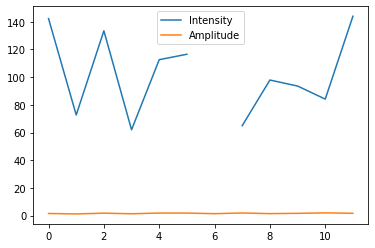

In [15]:
# DataFrame line plot
df.plot.line()

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1<sup>st</sup> code cell below, get a box plot for the DataFrame `df`.

</div>

In [16]:
# Generate a box plot for `df`


<AxesSubplot:>

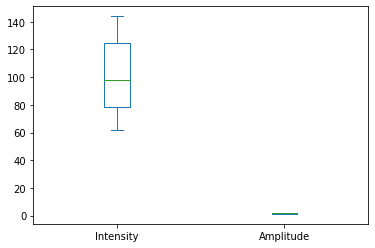

In [17]:
# Generate a box plot for `df`
df.plot.box()

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1<sup>st</sup> code cell below, get a scatter plot for the DataFrame `df`. What happened?
2) Try again buy this time declaring `x=` and `y=` parameters for the `.scatter()` method.

</div>

In [18]:
# Generate a scatter plot for `df`


<AxesSubplot:xlabel='Intensity', ylabel='Amplitude'>

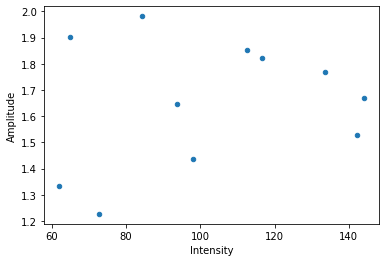

In [19]:
# Generate a scatter plot for `df`
df.plot.scatter(x='Intensity', y='Amplitude')

## DataFrame access

We can get the information stored in a DataFrame by multiple ways, here we will present the accession by brackets `[]` syntax.

### Accessing whole columns

In order to access columns we use the brackets syntax: `df[]`. Passing a list of column names inside the brackets grants you access to such columns. Note that there are two pairs of brackets, one enclosing the list of column names (innermost) and one given access to DataFrame columns (outermost):

In [20]:
# Accessing DataFrame columns
df[['Raw', 'Intensity']]

,Raw,Intensity
0,1985-04-06_0123_GA_C_R1,142.2949
1,1985-04-06_0123_GA_C_R2,72.7144
2,1985-04-06_0123_GA_T_R3,133.4933
3,1985-04-06_0123_GA_T_R4,62.0079
4,1985-04-06_0123_GA_C_R1,112.6438
5,1985-04-06_0123_GA_C_R2,116.5702
6,1985-04-06_0123_GA_T_R3,NaN
7,1985-04-06_0123_GA_T_R4,64.9835
8,1985-04-06_0123_GA_C_R1,97.9349
9,1985-04-06_0123_GA_C_R2,93.6013


When accessing a single column, we found some subtleties. Doing `df[['RNA']]` returns a single-column DataFrame...

In [21]:
# Get the data type of `df[['RNA']]`
type(df[['RNA']])

pandas.core.frame.DataFrame

... but sometimes it is better to get a Series instead of single-column DataFrame. That's because Series have specific methods that we might need. In order to access a DataFrame a get a Series we directly pass the label of the column we want to the outermost brackets:

In [22]:
# Get the data type of `df['RNA']`
type(df['RNA'])

pandas.core.series.Series

<div class="alert alert-block alert-danger"><b>Caveat:</b>

* Accessing a DataFrame by passing a *single-label list* to the `df[]` brackets returns a *single-column DataFrame*.
* Accessing a DataFrame by passing a *single label* to the `df[]` brackets returns a *Series*.    

</div>

### Accessing whole rows

In order to access rows we need to use [`.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) followed by the brackets syntax: `df.loc[]`. Passing a list of row indexes inside the brackets grants you access to such rows. Again, note that there are two pairs of brackets, one enclosing the list of row indexes (innermost) and one given access to DataFrame rows (outermost):

In [23]:
# Accessing DataFrame rows
df.loc[[4, 1]]

,Raw,Software,Node,RNA,Intensity,Amplitude
4,1985-04-06_0123_GA_C_R1,PD,Sequest,CCUGAACCCACUAUUGAUGAG,112.6438,1.8535
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.7144,1.2269


### Accessing columns and rows simultaneously

If we want to access the intersection of some columns and rows, we use [`.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) followed by the brackets syntax with a comma inside: `df.loc[ , ]`. The list with the rows we want goes to the left of the comma and the list with the columns to the right:

In [24]:
# Accessing multiple DataFrame rows and columns simultaneously
df.loc[[4, 1],  ['Raw', 'Intensity']]

,Raw,Intensity
4,1985-04-06_0123_GA_C_R1,112.6438
1,1985-04-06_0123_GA_C_R2,72.7144


As usual, you can first put your lists into a variables before accessing:

In [25]:
# Accessing DataFrame columns specifying first the list of indices and columns we want
list_rows = [4, 1]
list_cols = ['Raw', 'Intensity']
df.loc[list_rows, list_cols]

,Raw,Intensity
4,1985-04-06_0123_GA_C_R1,112.6438
1,1985-04-06_0123_GA_C_R2,72.7144


## Series methods

Like other Python objects, Pandas Series have very useful methods, for example [`.count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.count.html), [`.sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html), [`.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html), [`.median()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html), [`.std()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html), [`.min()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html), [`.max()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html)...

In [26]:
# Count 'Intensity' (Series) values
print(f"Count: {df['Intensity'].count()}")

# Sum 'Intensity' (Series) values
print(f"Sum: {df['Intensity'].sum()}")

# Get 'Intensity' (Series) mean
print(f"Mean: {df['Intensity'].mean()}")

# Get 'Intensity' (Series) median
print(f"Median: {df['Intensity'].median()}")

# Get 'Intensity' (Series) standard deviation
print(f"Standard deviation: {df['Intensity'].std()}")

# Get 'Intensity' (Series) minimum value
print(f"Minimum: {df['Intensity'].min()}")

# Get 'Intensity' (Series) maximum value
print(f"Maximum: {df['Intensity'].max()}")

Count: 11
Sum: 1124.4333
Mean: 102.2212090909091
Median: 97.9349
Standard deviation: 29.897234329531372
Minimum: 62.0079
Maximum: 144.0198


Another useful method is [`.quantile()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html):

In [27]:
# Get 'Intensity' (Series) 50% percentile value
print(f"Percentile  50%: {df['Intensity'].quantile()}")

# Get 'Intensity' (Series) 50% percentile value
print(f"Percentile  50%: {df['Intensity'].quantile(0.5)}")

# Get 'Intensity' (Series) 100% percentile value
print(f"Percentile 100%: {df['Intensity'].quantile(1)}")

# Get 'Intensity' (Series) 0% percentile value
print(f"Percentile   0%: {df['Intensity'].quantile(0)}")

Percentile  50%: 97.9349
Percentile  50%: 97.9349
Percentile 100%: 144.0198
Percentile   0%: 62.0079


Columns with non-numerical data also have cool methods, like: [`.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html), [`.nunique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html), [`.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html),...

In [28]:
# Get 'Node' (Series) unique values
print(f"Unique values: {df['Node'].unique()}")

# Get 'Node' (Series) number of unique values
print(f"Number of unique values: {df['Node'].nunique()}")

# Get 'Node' (Series) count of each unique values
print(f"Count of unique values:\n{df['Node'].value_counts()}")

Unique values: ['Amanda' 'Sequest' 'Andromeda']
Number of unique values: 3
Count of unique values:
Amanda       4
Sequest      4
Andromeda    4
Name: Node, dtype: int64


## DataFrame boolean indexing

Do you remember the six *comparison operators*? 
+ `==`: Equal.
+ `!=`: Not equal.
+ `>`: Greater than.
+ `<`: Less than.
+ `>=`: Greater than or equal to.
+ `<=`: Less than or equal to.

We can use them to know which DataFrame rows affirmatively "answer" our "question":

In [29]:
# Is the current index 'Intensity' greater than 100?
df['Intensity'] > 100

0      True
1     False
2      True
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11     True
Name: Intensity, dtype: bool

Furthermore, we can also use the *logical operators* `and`, `or`, `not`, but in their *bitwise* form (`&`, `|`, `~`, respectively) to link multiple "questions";

In [30]:
# Is the current index 'Intensity' greater than 100 AND 'Amplitude' smaller than 1.6?
(df['Intensity'] > 100) & (df['Amplitude'] < 1.6)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [31]:
# Is the current index 'Software' not equal to 'PD' OR 'Node' equal to 'Amanda'?
(df['Software'] != 'PD') | (df['Node'] == 'Amanda')

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10     True
11     True
dtype: bool

<div class="alert alert-block alert-danger"><b>Caveat:</b>

Keep in mind that DataFrame "questions" should be enclosed by parenthesis before linking them using `&`, `|`, `~`.

</div>

<div class="alert alert-block alert-success"><b>Practice:</b>

1) In the 1<sup>st</sup> code cell below, ask our DataFrame `df` to get which rows present an `'Intensity'` lower than `90` **or** higher than `140`, **and**, a `'Node'` named `'Andromeda'` **or** `'Amanda'`.
2) Inspect the DataFrame `df` and verify that boolean indexation is giving the correct answers.    

Un-comment and fill only those code lines with underscores `___`.
</div>

In [32]:
# Is the current index 'Software' not equal to 'PD' OR 'Node' equal to 'Amanda'?
#print(( (df['Intensity'] _ ___) _ (df['Intensity'] _ ___) ) & ( (df['Node'] _ '___') _ (df['Node'] _ '___') ))

# Return the DataFrame
# df

In [33]:
# Is the current index 'Software' not equal to 'PD' OR 'Node' equal to 'Amanda'?
print(( (df['Intensity'] > 140) | (df['Intensity'] < 90) ) & ( (df['Node'] == 'Andromeda') | (df['Node'] == 'Amanda') ))

# Return the DataFrame
df

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
dtype: bool


,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.2949,1.5295
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.7144,1.2269
2,1985-04-06_0123_GA_T_R3,PD,Amanda,CCUGAACCCACUAUUGAUGAG,133.4933,1.7687
3,1985-04-06_0123_GA_T_R4,PD,Amanda,CCUGAACCCACUAUUGAUGAG,62.0079,1.3316
4,1985-04-06_0123_GA_C_R1,PD,Sequest,CCUGAACCCACUAUUGAUGAG,112.6438,1.8535
5,1985-04-06_0123_GA_C_R2,PD,Sequest,CCUGAACCCACUAUUGAUGAG,116.5702,1.8213
6,1985-04-06_0123_GA_T_R3,PD,Sequest,CCUGAACCCACUAUUGAUGAG,NaN,1.4061
7,1985-04-06_0123_GA_T_R4,PD,Sequest,CCUGAACCCACUAUUGAUGAG,64.9835,1.9036
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,97.9349,1.4373
9,1985-04-06_0123_GA_C_R2,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,93.6013,1.6476


## Filtering DataFrames with boolean indexing

You can store the output of a boolean indexing into a variable:

In [34]:
# Create filter to get Proteome Discoverer software AND not to get Amanda search node
series_bool = (df['Software'] == 'PD') & (df['Node'] != 'Amanda')

# Get the variable type of `series_bool`
type(series_bool)

pandas.core.series.Series

Note that the output of a boolean indexation (question) is a Pandas Series, in particular a Series full of boolean values, aka *boolean Series* (answer). We can use such *boolean Series* to easily filter *DataFrames* in a very flexible way:

In [35]:
# Applying my (first) filter to my DataFrame
df[series_bool]

,Raw,Software,Node,RNA,Intensity,Amplitude
4,1985-04-06_0123_GA_C_R1,PD,Sequest,CCUGAACCCACUAUUGAUGAG,112.6438,1.8535
5,1985-04-06_0123_GA_C_R2,PD,Sequest,CCUGAACCCACUAUUGAUGAG,116.5702,1.8213
6,1985-04-06_0123_GA_T_R3,PD,Sequest,CCUGAACCCACUAUUGAUGAG,NaN,1.4061
7,1985-04-06_0123_GA_T_R4,PD,Sequest,CCUGAACCCACUAUUGAUGAG,64.9835,1.9036


<div class="alert alert-block alert-info"><b>Tip:</b>

You can rethink a *boolean Series* as a dataFrame "mask" that leaves uncovered only those rows of your interest.

</div>

<div class="alert alert-block alert-success"><b>Practice:</b>

In the 1<sup>st</sup> code cell below, we computed the 60% quantile of the 'Intensity' `I_quantile` and the 40% quantile of the 'Amplitude' `A_quantile`. Use this two variables that we have prepared for you to:
    
1) In the 2<sup>nd</sup> code cell below, create a boolean Series called `first_filter` to filter high intensity values (`> I_quantile`) **or** low amplitude values (`< A_quantile`) from the DataFrame `df`.
2) In the 3<sup>rd</sup> code cell below, use `first_filter` to get your rows of interest from the *DataFrame* `df`.
3) What you should change when creating `first_filter` if you would prefer high intensity values **and** low amplitude values. Create a boolean Series called `second_filter` for this purpose in the 3<sup>rd</sup> cell below, and get your new rows of interest from the *DataFrame* `df`.
    
Un-comment and fill only those code lines with underscores `___`.
</div>

In [36]:
# Retrieving the 60% quantile of the 'Intensity': I_quantile
I_quantile = df['Intensity'].quantile(0.60)
print(I_quantile)

# Retrieving the 40% quantile of the 'Amplitude': A_quantile
A_quantile = df['Amplitude'].quantile(0.40)
print(A_quantile)

112.6438
1.57674


In [37]:
# Create filter to get high peak intensity (first 60% quantile) OR low peak amplitude (last 40% quantile)
#first_filter = 

# Applying first filter to DataFrame
#df[___]

In [38]:
# Create filter to get high peak intensity (first 60% quantile) OR low peak amplitude (last 40% quantile)
first_filter = (df['Intensity'] > I_quantile) | (df['Amplitude'] < A_quantile)

# Applying first filter to DataFrame
df[first_filter]

,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.2949,1.5295
1,1985-04-06_0123_GA_C_R2,PD,Amanda,CCUGAACCCACUAUUGAUGAG,72.7144,1.2269
2,1985-04-06_0123_GA_T_R3,PD,Amanda,CCUGAACCCACUAUUGAUGAG,133.4933,1.7687
3,1985-04-06_0123_GA_T_R4,PD,Amanda,CCUGAACCCACUAUUGAUGAG,62.0079,1.3316
5,1985-04-06_0123_GA_C_R2,PD,Sequest,CCUGAACCCACUAUUGAUGAG,116.5702,1.8213
6,1985-04-06_0123_GA_T_R3,PD,Sequest,CCUGAACCCACUAUUGAUGAG,NaN,1.4061
8,1985-04-06_0123_GA_C_R1,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,97.9349,1.4373
11,1985-04-06_0123_GA_T_R4,MQ,Andromeda,CCUGAACCCACUAUUGAUGAG,144.0198,1.6713


In [39]:
# Create filter to get high peak intensity (first 60% quantile) AND low peak amplitude (last 40% quantile)
#second_filter = 

# Applying second filter to DataFrame
#df[___]

In [40]:
# Create filter to get high peak intensity (first 60% quantile) AND low peak amplitude (last 40% quantile)
second_filter = (df['Intensity'] > I_quantile) & (df['Amplitude'] < A_quantile)

# Applying second filter to DataFrame
df[second_filter]

,Raw,Software,Node,RNA,Intensity,Amplitude
0,1985-04-06_0123_GA_C_R1,PD,Amanda,CCUGAACCCACUAUUGAUGAG,142.2949,1.5295
